# Sistema de $N$ especies en competencia.

24/agosto/2022

Resumen: la idea es generar el primer paso de mi tesis comprobando la ley circular dada por Robert May y extendida por Stefano. El objetivo es generar sistemas de 5 y 10 especies en competencia con valores aleatorios en la matriz de interacciones, y ver si cumple la ley circular.

Para ello, de entrada se necesitará que los valores propios de la matriz tengan parte real negativa.

In [1]:
using LinearAlgebra
using Plots

plotlyjs()

WebIO._IJuliaInit()

Plots.PlotlyJSBackend()

In [19]:
"""RK4

Runge-Kutta 4. Es un integrador para resolver sistemas de ecuaciones diferenciales aunque
probablemente también pueda resolver ecuaciones diferenciales normales.

Parámetros:

f := función de variables Real
x0 := condiciones iniciales del sistema dinámico
t0 := tiempo inicial
tf := tiempo final
h := paso de integración
"""

function RK4(f,x0,t0,tf,h)
    #=al igual que en la función de eulerND, definimos una matriz de dimensión 
    (número de iteraciones × dimensión del sistema dinámico) como conjunto solución=#
    t = range(t0, stop = tf, step = h)
    n = length(t)
    dim = length(x0)
    #lo hacemos en un arreglo de ceros
    xs = zeros(n,dim)
    #imponemos la condición inicial en el primer renglón
    xs[1,:] = x0
    #generamos un ciclo for con las iteraciones de runge-kutta de cuarto orden
    for i in  2:n
        k1 = f(xs[i-1,:])
        k2 = f(xs[i-1,:]+(h/2)*k1)
        k3 = f(xs[i-1,:]+(h/2)*k2)
        k4 = f(xs[i-1,:]+h*k3)
        
        xs[i,:] = xs[i-1,:] + (h/6)*(k1+2*k2+2*k3+k4)
    end
    #=regresamos el resultado en una tupla, con los tiempos en la primera entrada y 
    el conjunto solución en la segunda entrada=#
    return (t , xs)
end


RK4 (generic function with 1 method)

Utilizar la función `randn()` para generar númeror aleatorios bajo la distribución normal.

In [2]:
using Random
rng = MersenneTwister(1234)
randn!(rng, zeros(5,5))

5×5 Matrix{Float64}:
  0.867347   2.21188   -0.560501    0.110096    1.56417
 -0.901744   0.532813  -0.0192918  -0.251176   -1.39674
 -0.494479  -0.271735   0.128064    0.369714    1.1055
 -0.902914   0.502334   1.85278     0.0721164  -1.10673
  0.864401  -0.516984  -0.827763   -1.50343    -3.21136

In [19]:
function hola(X)
    A = [rand() rand();rand() rand()]
    return A*X
end

hola (generic function with 1 method)

In [20]:
hola([1,1])

2-element Vector{Float64}:
 0.5375190267892946
 1.4357404181506883

In [33]:
randn(5,5) - Matrix(1I,5,5)
#Matrix(1I,5,5)

5×5 Matrix{Float64}:
  0.240729   -0.854998    -0.314548  -0.918211  -0.664112
 -0.0637414  -1.35274     -0.193449  -0.150626  -0.452517
 -0.324812    0.00756373  -0.721251  -0.842769  -1.08491
 -0.468692    0.387738    -0.231456  -2.60038   -1.43034
 -0.249876    1.87454      0.660237  -0.193022   0.274436

### 30 enero 2023

In [1]:
include("/home/rogve98/Documentos/Tesis/Tesis/Código/Codigo/main.jl")

WebIO._IJuliaInit()

redAleatoria (generic function with 1 method)

In [7]:
#Red aleatoria
M = randomMatrix(5,0.25)
display(M)
gplot(g,nodelabel = 1:5)

(sparse([1, 2, 3, 4, 2, 3, 2, 4, 5], [1, 2, 2, 2, 3, 3, 4, 4, 5], [0.9630191850930543, 1.1062746859235983, 0.44417653115292144, 1.2138734366058475, -0.8161322154740611, 1.4919563676200687, 1.4304983356241112, 1.012186276098995, 0.4637596307604109], 5, 5), SimpleGraph{Int64}(2, [Int64[], [3, 4], [2], [2], Int64[]]))

LoadError: UndefVarError: g not defined

In [8]:
x0 = [rand(), rand(), rand(), rand(), rand()]
#x0 = [rand(),1]
t0 = 0
tf = 20
dt = 0.1

t, sol = cincoEspecies(x0,t0,tf,dt,M)

LoadError: MethodError: no method matching *(::Tuple{SparseArrays.SparseMatrixCSC{Float64, Int64}, SimpleGraph{Int64}}, ::Vector{Float64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:591
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at ~/julia-1.8.4-linux-x86_64/julia-1.8.4/share/julia/stdlib/v1.8/LinearAlgebra/src/matmul.jl:49
[0m  *([91m::Union{SparseArrays.AbstractSparseMatrixCSC{TA, Ti}, SubArray{TA, 2, <:SparseArrays.AbstractSparseMatrixCSC{TA, Ti}, Tuple{Base.Slice{Base.OneTo{Int64}}, I}} where I<:AbstractUnitRange} where Ti[39m, ::Union{StridedVector, BitVector}) where TA at ~/julia-1.8.4-linux-x86_64/julia-1.8.4/share/julia/stdlib/v1.8/SparseArrays/src/linalg.jl:50
[0m  ...

In [9]:
plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2)
plot!(t,sol[:,3],label ="Especie 3",w=2)
plot!(t,sol[:,4],label ="Especie 4",w=2)
plot!(t,sol[:,5],label ="Especie 5",w=2)

LoadError: UndefVarError: sol not defined

In [10]:
plot(sol[:,1],sol[:,3],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
)

LoadError: UndefVarError: sol not defined

Encontrar puntos fijos y averiguar si se trata de atractores o repulsores. Aquí mi primera interpretación es que las ovejas ganan y los conejos se extinguen.

## 7 de febrero 2022

Continuamos con el trabajo revisando fallas de los modelos. Vamos a hacer pruebas para 2 especies y de ahí extenderlo a los otros sistemas.

$$
\frac{dx_i}{dt}=r_ix_i\left(1-\frac{\sum_{j=1}^N \alpha_{ij}x_j}{K_i}\right)
$$





\begin{cases}
\dot{x}_1&=r_1x_1(1-\frac{a_{11}x_1}{k_1}-\frac{a_{12}x_1x_2}{k_1})\\
\dot{x}_2&=r_2x_2(1-\frac{a_{21}x_2}{k_2}-\frac{a_{22}x_1x_2}{k_2})
\end{cases}

In [1]:
include("/home/rogve98/Documentos/Tesis/Tesis/Código/Codigo/main.jl")

WebIO._IJuliaInit()

redAleatoria (generic function with 1 method)

2×2 Matrix{Float64}:
 0.0523122  0.0
 0.0        0.103384

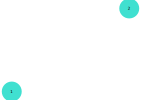

In [2]:
A,g = randomMatrix(2,0.6)
display(A)
gplot(g,nodelabel = 1:2)

In [3]:
x0 = sample(1:0.1:4,2)
t0 = 0
tf = 20
dt = 0.1

t, sol = pruebas(x0,t0,tf,dt,A)

(0.0:0.1:20.0, [3.6 1.8; 4.307248305793326 2.378111250730561; … ; 38.231982387988 29.018017710199373; 38.231982387988 29.018017710199373])

In [4]:
p1 = plot(t,sol[:,1],label ="Especie 1",w=2)
plot!(t,sol[:,2],label ="Especie 2",w=2)

p2 = plot(sol[:,1],sol[:,2],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
    xlim = [0,4],
    ylim = [0,4]
)
scatter!((sol[1,1],sol[1,2]),label="T=t0")
plot(p1,p2,size=(900,400))

In [94]:
r = [2,3]
K = [2,3]
function prueba(X)
    sis = zeros(2)
    xs = zeros(2)
    for i in 1:2
        for j in 1:2
            xs[i] += A[i,j]*X[j]
        end
        sis[i] = r[i]*X[i]*(1-xs[i]/K[i])
    end
    return xs
end

prueba (generic function with 1 method)

# 10 de febrero 2023

Ya corregí el sistema, hice la respectiva prueba con un sistema de dos por dos, y encontré varios obstáculos; sobre todo aspectos del sistema que no estaban del todo correctos. Fueron corregidos con base en la función de la celda anterior y a continuación serán implementados en los sistemas de 5 y 10 especies. La idea es que estos sistemas respeten su capacidad de carga.

In [5]:
include("/home/rogve98/Documentos/Tesis/Tesis/Código/Codigo/main.jl")

redAleatoria (generic function with 1 method)

\begin{cases}
\dot{x}_1&=0.5x_1(1-\frac{0.1x_1}{2}-\frac{0.7x_1x_2}{2})\\
\dot{x}_2&=0.7x_2(1-\frac{2.1x_2}{3}-\frac{1.2x_1x_2}{1.2}
\end{cases}

In [7]:
#A = [r1/k1 r1α/k1;r2β/k2 r2/k2]
#A = [0.5 0.7;2.1 1.2]
r = [0.3,0.7]
K = [2,3]
x0 = [1.7,0.4]
t0 = 0
tf = 50
dt = 0.01

t, sol = pruebas(x0,t0,tf,dt,r,K)

(0.0:0.01:50.0, [1.7 0.4; 1.7044125032264204 0.4026384971159133; … ; 10.444773912465633 10.525164204360184; 10.444775253024332 10.525163729171474])

In [8]:
p1 = plot(t,sol[:,1],label ="",w=2)
plot!(t,sol[:,2],label ="",w=2)

p2 = plot(sol[:,1],sol[:,2],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
    xlim = [0,4],
    ylim = [0,4]
)
scatter!((sol[1,1],sol[1,2]),label="")
plot(p1,p2,size=(900,400))

In [49]:
function unaEspecie(x0,t0,tf,dt)
    r = 0.2
    K = 3.
    function sistema(X)
        return [r*X[1]*(1-X[1]/K)]
    end
    
    return RK4(sistema,x0,t0,tf,dt)
end

unaEspecie (generic function with 1 method)

In [53]:
x0 = [1]
t0 = 0
tf = 20
dt = 0.1

t, sol = unaEspecie(x0,t0,tf,dt)

(0.0:0.1:20.0, [1.0; 1.0133774790146686; … ; 2.8919250623753268; 2.8939894677146145;;])

In [54]:
plot(t,sol)

5×5 Matrix{Float64}:
  2.08736   0.0       0.157327  -0.798237  0.0
  0.0       0.295747  0.0        0.0       0.0
  0.503577  0.0       1.04368    0.0       0.0
 -0.160939  0.0       0.0        0.690985  0.0
  0.0       0.0       0.0        0.0       1.84205

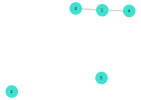

In [12]:
M,g = randomMatrix(5,0.1)
display(M)
gplot(g,nodelabel = 1:5)

In [13]:
x0 = sample(1:0.1:5,5)
t0 = 0
tf = 20
dt = 0.1

t, sol5 = cincoEspecies(x0,t0,tf,dt,M)

(0.0:0.1:20.0, [3.2 3.8 … 2.6 1.6; 2.56003429865422 4.535082665513464 … 3.022862867104515 1.7520034402053148; … ; 2.874475896830604 10.143795868255177 … 5.01112856878723 2.1714884157125973; 2.8744761311615528 10.143795868255177 … 5.0111286314699655 2.1714884157125973])

In [14]:
plot(t,sol5[:,1],label ="Especie 1",w=2,
    title = "5 Especies en competencia",
    xlabel = "Tiempo",
    ylabel = "N_(t)"
)
plot!(t,sol5[:,2],label ="Especie 2",w=2)
plot!(t,sol5[:,3],label ="Especie 3",w=2)
plot!(t,sol5[:,4],label ="Especie 4",w=2)
plot!(t,sol5[:,5],label ="Especie 5",w=2)

## 15 de febrero

Vamos a intentar corregir el modelo modificando la entrada $a_{ii}$ de la matriz A.

In [1]:
include("/home/rogve98/Documentos/Tesis/Tesis/Código/Codigo/main.jl")

WebIO._IJuliaInit()

redAleatoria (generic function with 1 method)

In [4]:
#A = [r1/k1 r1α/k1;r2β/k2 r2/k2]
#A = [0.5 0.7;2.1 1.2]
r = [1,1]
K = [2,3]
x0 = [1.7,0.4]
t0 = 0
tf = 50
dt = 0.01

t, sol = pruebas(x0,t0,tf,dt,r,K)

(0.0:0.01:50.0, [1.7 0.4; 1.7095783225722596 0.4031402700506662; … ; 3.286570015970597 5.99176045511457; 3.286570015969656 5.991760455117786])

In [5]:
p1 = plot(t,sol[:,1],label ="",w=2)
plot!(t,sol[:,2],label ="",w=2)

p2 = plot(sol[:,1],sol[:,2],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
    xlim = [0,4],
    ylim = [0,4]
)
scatter!((sol[1,1],sol[1,2]),label="")
plot(p1,p2,size=(900,400))

# 27 de febrero, 2023

Regresamos a ver que pez con el código.

In [52]:
include("/home/rogve98/Documentos/Tesis/Tesis/Código/Codigo/main.jl")

poblacionesLK (generic function with 1 method)

In [55]:
#A = [r1/k1 r1α/k1;r2β/k2 r2/k2]
#A = [0.5 0.7;2.1 1.2]
r = [2,3]
K = [2,3]
x0 = sample(0:0.01:4,2)
t0 = 0
tf = 50
dt = 0.01

(t, sol), A = pruebas(x0,t0,tf,dt,r,K)

((0.0:0.01:50.0, [0.37 0.19; 0.3755440906303485 0.19489651806979885; … ; 4.522888442838787e-5 2.999966020572301; 4.5146796926308735e-5 2.999966082243293]), [1.0 0.7272126453489441; 0.7057843028910243 1.0])

In [56]:
p1 = plot(t,sol[:,1],label ="Especie 1",w=2)
plot!(t,sol[:,2],label ="Especie 2",w=2)

p2 = plot(sol[:,1],sol[:,2],w=2,
    #xlabel = "Tiempo",
    xlabel = "Conejos",
    ylabel = "Ovejas",
    label = "",
    xlim = [0,4],
    ylim = [0,4]
)
scatter!((sol[1,1],sol[1,2]),label="t0")
plot(p1,p2,size=(900,400))

In [83]:
A

2×2 Matrix{Float64}:
 1.0       0.409224
 0.519206  1.0

¡Lo logré! ya coinciden estas gráficas con el espacio fase que se encuentra en elementos básicos, ahora queda extenderlo a los otros sistemas de más especies, con la intención de que respeten su capacidad de carga.

In [71]:
x0 = rand(5)
t0 = 0
tf = 50
dt = 0.1
r = rand(5)
K = 2*ones(5)

t, sol = cincoEspecies(x0,t0,tf,dt,r,K)

(0.0:0.1:50.0, [0.9079631444787623 0.1476111024157637 … 0.17776439583680448 0.9907529265934583; 0.9210646618839473 0.15341516094536076 … 0.18179580316601737 1.0081501277034497; … ; 1.5322134272742542 0.951959269577173 … 1.639377044904841 1.32067274881232; 1.5322088641543583 0.9519614891943131 … 1.6393849550408621 1.3206727643807648])

In [72]:
plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2)
plot!(t,sol[:,3],label ="Especie 3",w=2)
plot!(t,sol[:,4],label ="Especie 4",w=2)
plot!(t,sol[:,5],label ="Especie 5",w=2)

### Ahora ya con la red aleatoria

In [1]:
include("/home/rogve98/Documentos/Tesis/Tesis/Código/Codigo/main.jl")

WebIO._IJuliaInit()

poblacionesLK (generic function with 1 method)

In [10]:
x0 = sample(0:0.1:4,5)
t0 = 0
tf = 50
dt = 0.1
#r = [2,3]
#K = [2,3]

p = 0.1
N = 5

(t, sol),A = poblacionesLK(x0,t0,tf,dt,N,p)

((0.0:0.1:50.0, [1.2 3.3 … 3.5 3.0; 1.3464408508218337 3.241247458464982 … 3.5086559068478316 2.4917562053072007; … ; 2.999999999999999 3.000000000000001 … 3.065688187756235 0.3299196666724991; 2.999999999999999 3.000000000000001 … 3.065688184574692 0.32991965275519713]), [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 -0.19910353525058944; 0.0 0.0 … 0.8709564740245913 1.0])

In [11]:
plot(t,sol[:,1],label ="Especie 1",w=2)

plot!(t,sol[:,2],label ="Especie 2",w=2)
plot!(t,sol[:,3],label ="Especie 3",w=2)
plot!(t,sol[:,4],label ="Especie 4",w=2)
plot!(t,sol[:,5],label ="Especie 5",w=2)